#### Nama : Gina Cahya Utami
#### Username : Gina Cahya
#### SIB ID : M182V4139
#### Email : ginacu.gc@gmail.com
#### Dataset : https://www.kaggle.com/sandeep04201988/housing-price-index-using-crime-rate-data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# Data Loading

In [ ]:
df = pd.read_csv('merged_dataset.csv')
df.head()

,Year,index_nsa,"City, State",Population,Violent Crimes,Homicides,Rapes,Assaults,Robberies
0,1975.0,41.080,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0
1,1975.0,30.750,"Chicago, IL",3150000.0,37160.0,818.0,1657.0,12514.0,22171.0
2,1975.0,36.350,"Cleveland, OH",659931.0,10403.0,288.0,491.0,2524.0,7100.0
3,1975.0,20.910,"Oakland, CA",337748.0,5900.0,111.0,316.0,2288.0,3185.0
4,1975.0,20.385,"Seattle, WA",503500.0,3971.0,52.0,324.0,1492.0,2103.0


Deskripsi Variabel :
* Year = Tahun
* index_nsa = Harga rumah (non seasonal index)
* City, State = Kota, Negara Bagian
* Population = Populasi
* Violent Crimes = Kekerasan
* Homicides = Pembunuhan 
* Rapes = Perkosaan
* Assaults = Penyerangan
* Robberies = Perampokan

In [ ]:
df.shape

(3477, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3477 entries, 0 to 3476
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            1741 non-null   float64
 1   index_nsa       1741 non-null   float64
 2   City, State     1741 non-null   object 
 3   Population      1714 non-null   float64
 4   Violent Crimes  1708 non-null   float64
 5   Homicides       1709 non-null   float64
 6   Rapes           1709 non-null   float64
 7   Assaults        1708 non-null   float64
 8   Robberies       1709 non-null   float64
dtypes: float64(8), object(1)
memory usage: 244.6+ KB


In [ ]:
df.describe()

,Year,index_nsa,Population,Violent Crimes,Homicides,Rapes,Assaults,Robberies
count,1741.000000,1741.000000,1.714000e+03,1708.000000,1709.000000,1709.000000,1708.000000,1709.000000
mean,1995.705916,125.694362,6.215285e+05,7794.244731,115.073727,411.817437,3853.742389,3414.265652
std,11.439180,62.628859,4.990524e+05,8798.877886,143.479643,405.449207,4344.991053,4205.968372
min,1975.000000,20.385000,1.129940e+05,385.000000,1.000000,34.000000,264.000000,83.000000
25%,1986.000000,75.430000,3.577292e+05,3243.000000,35.000000,194.000000,1617.000000,1102.000000
50%,1996.000000,110.024167,4.709700e+05,5119.000000,62.000000,298.000000,2588.000000,2106.000000
75%,2006.000000,168.090000,6.572175e+05,9103.750000,124.000000,485.000000,4574.500000,3797.000000
max,2015.000000,386.211875,3.150000e+06,90520.000000,960.000000,3754.000000,42237.000000,43783.000000


# EDA : Menangani Missing Value

In [ ]:
df.isnull().sum()

Year              1736
index_nsa         1736
City, State       1736
Population        1763
Violent Crimes    1769
Homicides         1768
Rapes             1768
Assaults          1769
Robberies         1768
dtype: int64

In [ ]:
new_df = df.dropna()

In [ ]:
new_df.isna().sum()

Year              0
index_nsa         0
City, State       0
Population        0
Violent Crimes    0
Homicides         0
Rapes             0
Assaults          0
Robberies         0
dtype: int64

In [ ]:
new_df.shape

(1708, 9)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708 entries, 0 to 3476
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            1708 non-null   float64
 1   index_nsa       1708 non-null   float64
 2   City, State     1708 non-null   object 
 3   Population      1708 non-null   float64
 4   Violent Crimes  1708 non-null   float64
 5   Homicides       1708 non-null   float64
 6   Rapes           1708 non-null   float64
 7   Assaults        1708 non-null   float64
 8   Robberies       1708 non-null   float64
dtypes: float64(8), object(1)
memory usage: 133.4+ KB


Dapat dilihat dari informasi df.info() di atas bahwa terdapat kejanggalan diantaranya yakni fitur Year, Population, Violent Crimes, Homicides, Rapes, Assaults, dan Robberies tipe datanya float64, kalau dipikir tidak mungkin tahunnya merupakan bentuk float. Maka dari itu solusinya kita ubah float ke bentuk int

In [ ]:
new_df['Year'] = new_df['Year'].astype('int')
new_df['Population'] = new_df['Population'].astype('int')
new_df['Violent Crimes'] = new_df['Violent Crimes'].astype('int')
new_df['Homicides'] = new_df['Homicides'].astype('int')
new_df['Rapes'] = new_df['Rapes'].astype('int')
new_df['Assaults'] = new_df['Assaults'].astype('int')
new_df['Robberies'] = new_df['Robberies'].astype('int')

new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708 entries, 0 to 3476
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            1708 non-null   int32  
 1   index_nsa       1708 non-null   float64
 2   City, State     1708 non-null   object 
 3   Population      1708 non-null   int32  
 4   Violent Crimes  1708 non-null   int32  
 5   Homicides       1708 non-null   int32  
 6   Rapes           1708 non-null   int32  
 7   Assaults        1708 non-null   int32  
 8   Robberies       1708 non-null   int32  
dtypes: float64(1), int32(7), object(1)
memory usage: 86.7+ KB


<ipython-input-12-7c58bd51f02c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Year'] = new_df['Year'].astype('int')
<ipython-input-12-7c58bd51f02c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Population'] = new_df['Population'].astype('int')
<ipython-input-12-7c58bd51f02c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

# EDA : Menangani Outliers

<AxesSubplot:xlabel='Year'>

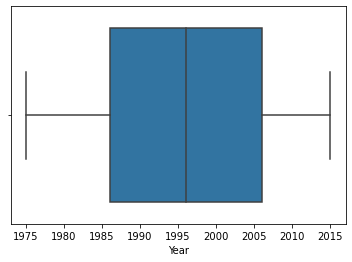

In [ ]:
sns.boxplot(x=new_df['Year'])

<AxesSubplot:xlabel='Population'>

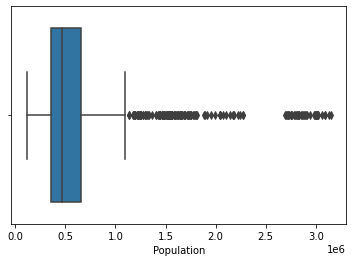

In [ ]:
sns.boxplot(x=new_df['Population'])

<AxesSubplot:xlabel='Violent Crimes'>

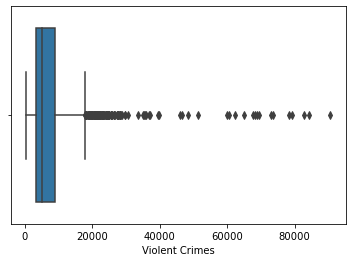

In [ ]:
sns.boxplot(x=new_df['Violent Crimes'])

<AxesSubplot:xlabel='Homicides'>

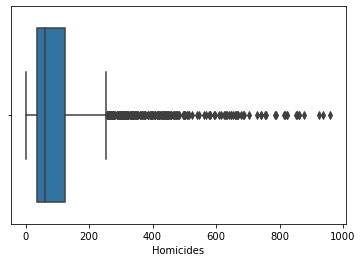

In [ ]:
sns.boxplot(x=new_df['Homicides'])

<AxesSubplot:xlabel='Rapes'>

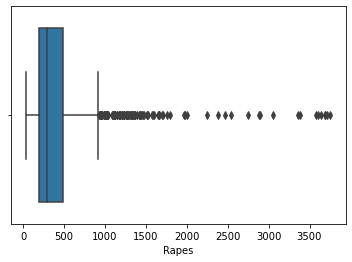

In [ ]:
sns.boxplot(x=new_df['Rapes'])

<AxesSubplot:xlabel='Assaults'>

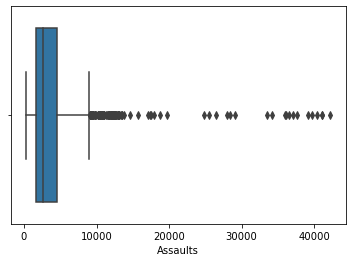

In [ ]:
sns.boxplot(x=new_df['Assaults'])

<AxesSubplot:xlabel='Robberies'>

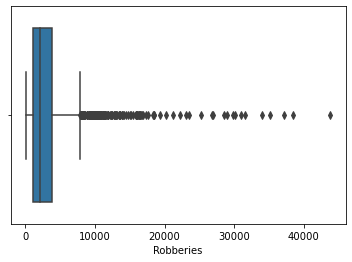

In [ ]:
sns.boxplot(x=new_df['Robberies'])

Boxplot pada fitur numerik diatas mempunyai jumlah outlier yang cukup banyak, kecuali pada fitur 'Year', sehingga solusinya kita menggunakan teknik IQR untuk menghilangkan outlier

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
df.shape

(3198, 9)

# EDA : Univariate Analysis

Bagi fitur pada dataset menjadi dua bagian, yaitu numerical features dan categorical features

In [ ]:
numerical_features = ['Year', 'index_nsa', 'Population', 'Violent Crimes', 'Homicides', 'Rapes', 'Assaults', 'Robberies']
categorical_features = ['City, State']

Categorical Features

                  jumlah sampel  persentase
Chicago, IL                  41         2.4
Washington, DC               41         2.4
Atlanta, GA                  41         2.4
Seattle, WA                  41         2.4
Oakland, CA                  41         2.4
Baltimore, MD                40         2.3
Houston, TX                  40         2.3
Pittsburgh, PA               40         2.3
Wichita, KS                  40         2.3
Dallas, TX                   40         2.3
Miami, FL                    40         2.3
Detroit, MI                  40         2.3
Philadelphia, PA             40         2.3
Cleveland, OH                40         2.3
Denver, CO                   40         2.3
Columbus, OH                 40         2.3
Newark, NJ                   40         2.3
Minneapolis, MN              40         2.3
Sacramento, CA               40         2.3
Aurora, CO                   40         2.3
Tulsa, OK                    39         2.3
Albuquerque, NM              39 

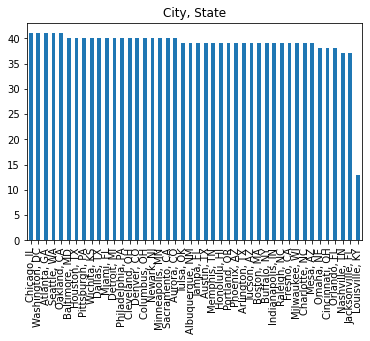

In [ ]:
# fitur City, State

feature = categorical_features[0]
count = new_df[feature].value_counts()
percent = 100*new_df[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Numerical Features

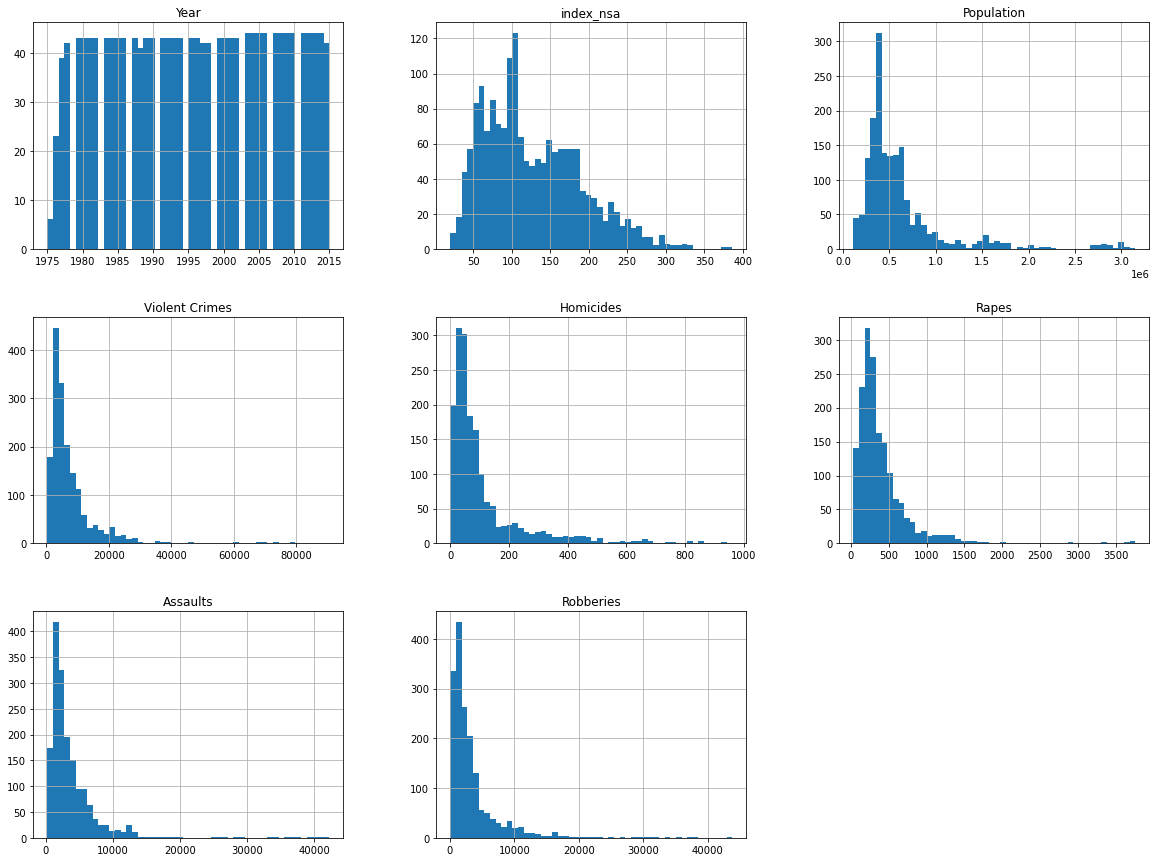

In [ ]:
new_df.hist(bins=50, figsize=(20,15))
plt.show()

# EDA : Multivariate Analysis

Categorical Features

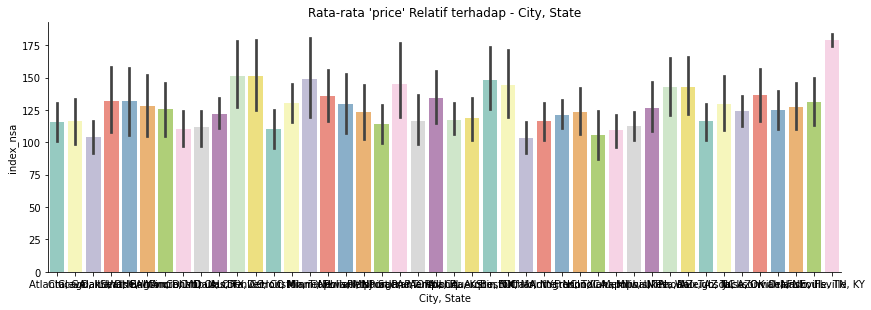

In [ ]:
cat_features = new_df.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
    sns.catplot(x=col, y="index_nsa", kind="bar", dodge=False, height = 4, aspect = 3,  data=new_df, palette="Set3")
    plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

Fitur City, State dengan grade lebih tinggi memiliki harga yang lebih rendah. Hal ini berarti bahwa fitur kategori memiliki pengaruh yang rendah terhadap harga. Sehingga lebih baik kita drop saja

In [ ]:
new_df.drop(['City, State'], axis=1, inplace=True)
new_df.head()

,Year,index_nsa,Population,Violent Crimes,Homicides,Rapes,Assaults,Robberies
0,1975,41.080,490584,8033,185,443,3518,3887
1,1975,30.750,3150000,37160,818,1657,12514,22171
2,1975,36.350,659931,10403,288,491,2524,7100
3,1975,20.910,337748,5900,111,316,2288,3185
4,1975,20.385,503500,3971,52,324,1492,2103


Numerical Features

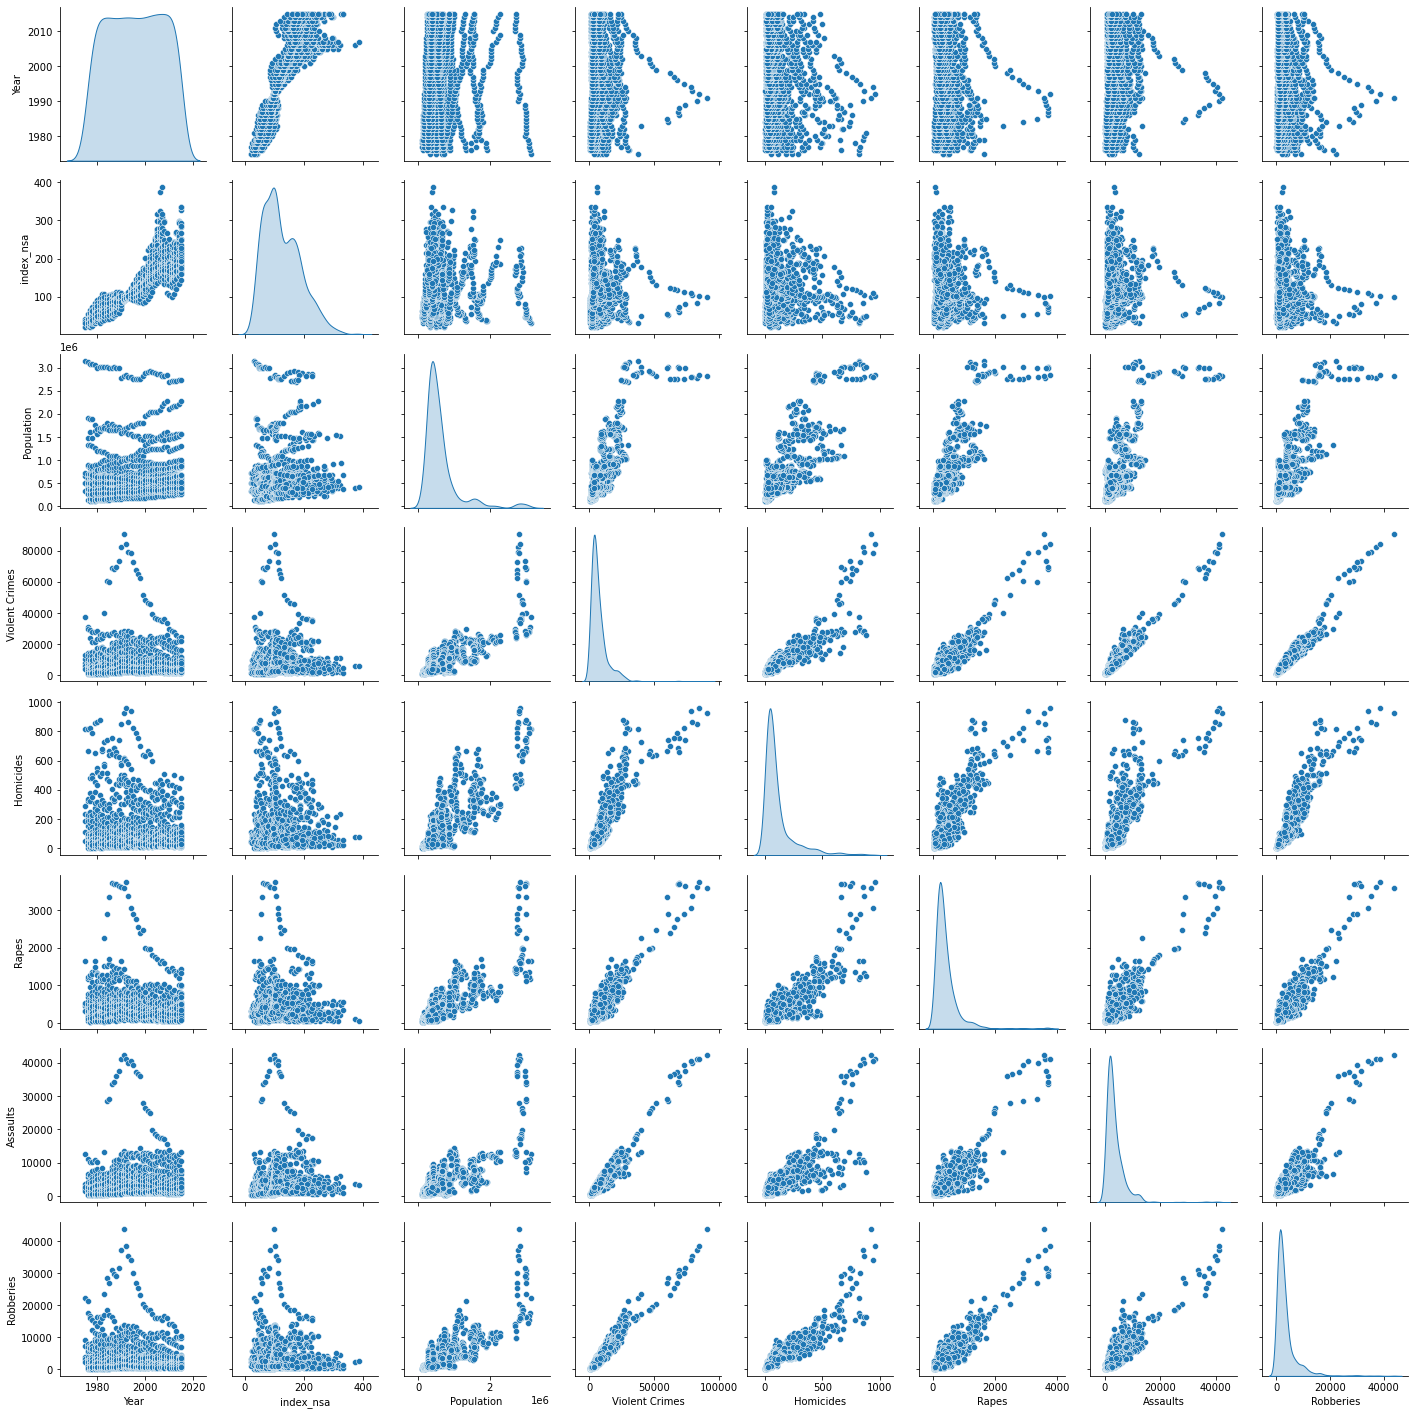

In [ ]:
sns.pairplot(new_df, diag_kind = 'kde')

Observasi korelasi antara fitur numerik dengan fitur target menggunakan fungsi corr()

Text(0.5, 1.0, 'Correlation Matrix')

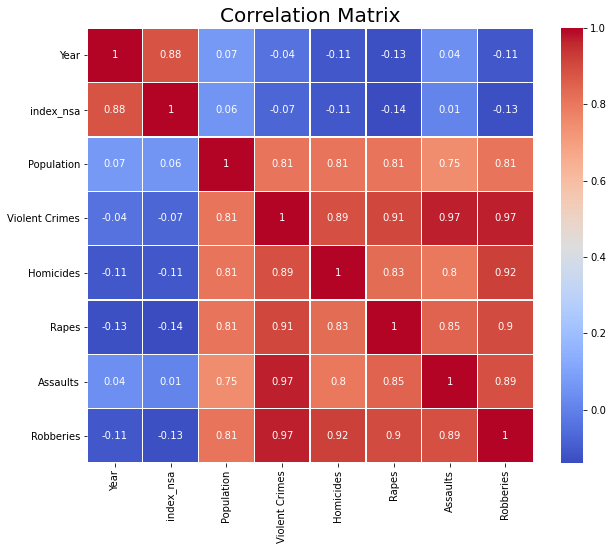

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = new_df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix", size=20)

# Data Preparation

Train-Test-Split

In [ ]:
x = new_df.drop(["index_nsa"],axis =1)
y = new_df["index_nsa"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 150)

In [ ]:
print(f'Total dataset: {len(x)}')
print(f'Total train dataset: {len(x_train)}')
print(f'Total test dataset: {len(x_test)}')

Total dataset: 1708
Total train dataset: 1366
Total test dataset: 342


Standarisasi 

In [ ]:
numerical_features = ['Year', 'Population', 'Violent Crimes', 'Homicides', 'Rapes', 'Assaults', 'Robberies']
scaler = StandardScaler()
scaler.fit(x_train[numerical_features])
x_train[numerical_features] = scaler.transform(x_train.loc[:, numerical_features])
x_train[numerical_features].head()

<ipython-input-30-21aeb5745f87>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[numerical_features] = scaler.transform(x_train.loc[:, numerical_features])
C:\Users\welly\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Year,Population,Violent Crimes,Homicides,Rapes,Assaults,Robberies
3404,1.674665,4.082825,1.864868,2.443648,2.436298,2.071972,1.441178
926,-0.765062,-0.502674,-0.452007,-0.469089,-0.499010,-0.292664,-0.579606
872,-0.852195,0.375831,-0.648882,-0.482636,-0.426890,-0.711793,-0.564442
0,-1.810659,-0.271490,0.014084,0.458923,0.058723,-0.085801,0.096943
306,-1.462126,0.050332,0.294539,0.425054,0.169307,-0.210504,0.804521


mengecek nilai mean dan standar deviasi pada setelah proses standarisasi

In [ ]:
x_train[numerical_features].describe().round(4)

,Year,Population,Violent Crimes,Homicides,Rapes,Assaults,Robberies
count,1366.0000,1366.0000,1366.0000,1366.0000,1366.0000,1366.0000,1366.0000
mean,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000
std,1.0004,1.0004,1.0004,1.0004,1.0004,1.0004,1.0004
min,-1.8107,-1.0061,-0.8371,-0.7807,-0.9245,-0.8183,-0.7905
25%,-0.8522,-0.5367,-0.5259,-0.5622,-0.5399,-0.5188,-0.5555
50%,0.0191,-0.3097,-0.3118,-0.3810,-0.2911,-0.3011,-0.3173
75%,0.8905,0.0628,0.1552,0.0660,0.1645,0.1713,0.0852
max,1.6747,4.9025,8.4955,5.7086,8.0184,8.3769,8.1598


# Modelling

Siapkan DataFrame untuk analisis model

In [ ]:
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['LinearRegression', 'KNN', 'RandomForest'])

# Modelling : Linear Regression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

models.loc['train_mse','LinearRegression'] = mean_squared_error(y_pred=lin_reg.predict(x_train), y_true=y_train)

# Modelling : K-Nearest Neighbor

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train, y_train)

models.loc['train_mse','KNN'] = mean_squared_error(y_pred=knn.predict(x_train), y_true=y_train)

# Modelling : Random Forest

In [ ]:
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(x_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(x_train), y_true=y_train)

# Evaluasi Model

Proses scaling

In [ ]:
x_test.loc[:, numerical_features] = scaler.transform(x_test[numerical_features])

C:\Users\welly\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


Evaluasi kedua model kita dengan metrik MSE

In [ ]:
mse = pd.DataFrame(columns=['train', 'test'], index=['LinearRegression','KNN', 'RandomForest'])
model_dict = {'LinearRegression': lin_reg, 'KNN': knn, 'RandomForest':RF}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(x_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(x_test))/1e3

mse

,train,test
LinearRegression,0.892576,0.96617
KNN,0.380629,0.52106
RandomForest,0.0454171,0.334078


Buat versi chart nya agar mudah dibaca

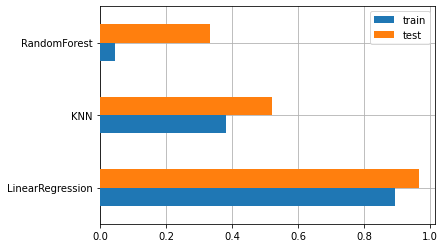

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [ ]:
prediksi = x_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_LinearRegression,prediksi_KNN,prediksi_RandomForest
2732,386.211875,177.8,214.7,273.0


Terlihat bahwa prediksi dengan Random Forest (RF) memberikan hasil yang paling mendekati.

In [ ]:
print("Accuracy score dari model Linear Regression = ", lin_reg.score(x_test, y_test))
print("Accuracy score dari model KNN               = ", knn.score(x_test, y_test))
print("Accuracy score dari model Random Forest     = ", RF.score(x_test, y_test))

Accuracy score dari model Linear Regression =  0.760807233952006
Accuracy score dari model KNN               =  0.8710022235399519
Accuracy score dari model Random Forest     =  0.9172929820665391


Dan accuracy pada model Random Forest yang paling tinggi yakni mencapai lebih dari 90%. Sehingga model yang cocok yakni Random Forest